In [1]:
# Importing Libraries
import warnings
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pickle import dump
from pickle import load
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [2]:
# load the data
users_data=pd.read_csv(r'C:\Users\dell\Desktop\PROJECT 1\Users (1).csv')

In [3]:
users_data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [4]:
# shape of the data
users_data.shape

(278858, 3)

In [5]:
# top 5 rows
users_data.head(20)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
users_data.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [8]:
users_data.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [9]:
# checking duplicated values
users_data.loc[users_data.duplicated()]

,User-ID,Location,Age


<AxesSubplot:>

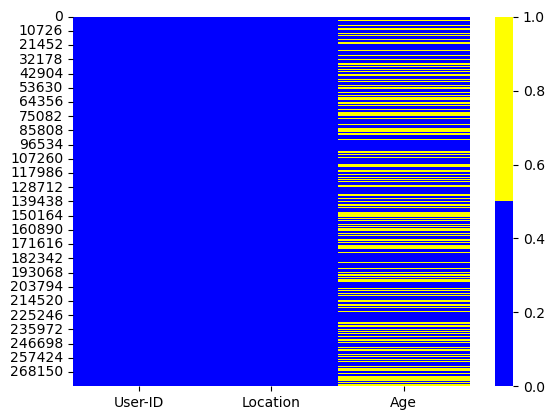

In [10]:
# checking Missing values
import seaborn as sns
cols = users_data.columns 
colours = ['blue', 'yellow'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(users_data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [11]:
## checking null values
users_data.loc[users_data['Age'].isnull()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [12]:

mean=users_data['Age'].mean()
print(mean)

34.75143370454978


In [13]:
## mwan impuation on null values
users_data['Age'] = users_data['Age'].fillna(users_data['Age'].mean())
users_data.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [14]:
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434


## Outliers

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

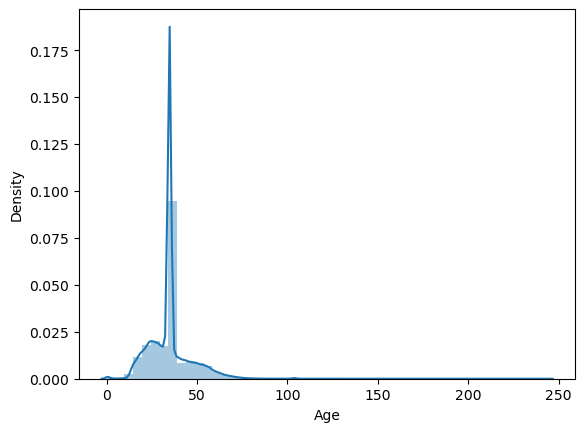

In [15]:
## distplot
sns.distplot(users_data['Age'])

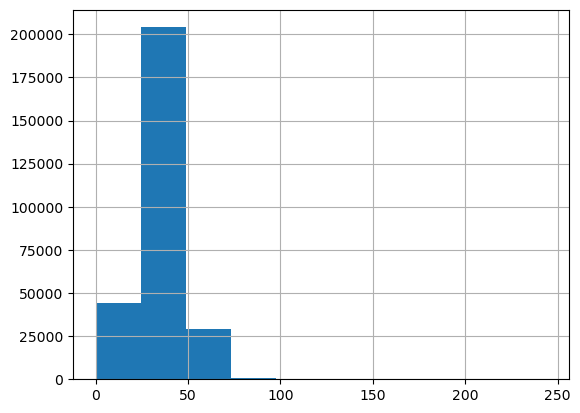

In [16]:
## histogram
users_data['Age'].hist()

plt.show()

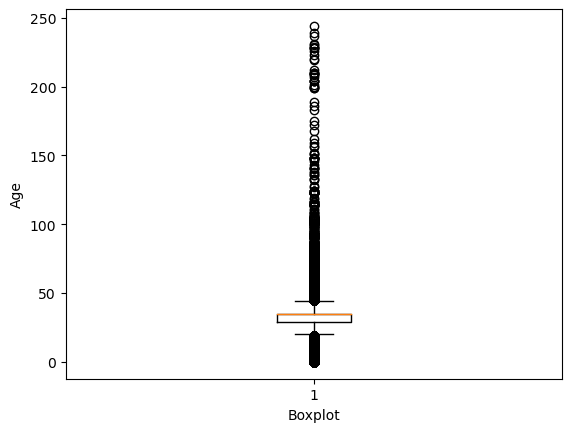

In [17]:
## boxplot 
plt.boxplot(users_data['Age'])
plt.xlabel('Boxplot')
plt.ylabel('Age')
plt.show()

In [18]:
## upto age group of 50-60 we have book readers

In [19]:
print(users_data.Location.unique())

['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


In [20]:
## We have very large location database and we cannot interpret from this. 

In [21]:
## We have very large location database and we cannot interpret from this.

In [22]:
for i in users_data:
    users_data['Country']=users_data.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [23]:
users_data.Country.nunique()

529

In [24]:
print(users_data.Country.unique())

['usa' 'russia' 'portugal' 'united kingdom' 'canada' 'spain' 'australia'
 'brazil' '' 'germany' 'mexico' 'china' 'italy' 'distrito federal'
 'france' 'netherlands' 'iraq' 'finland' 'new zealand' 'india' 'ghana'
 'switzerland' 'slovenia' 'iran' 'peru' nan 'vietnam' 'sri lanka'
 'pakistan' 'denmark' 'belgium' 'malaysia' 'turkey' 'philippines' 'greece'
 'colombia' 'norway' 'kuwait' 'chile' 'quit' 'lj' 'taiwan' 'españa'
 'sweden' 'argentina' 'nigeria' 'london' 'bulgaria' 'austria' 'romania'
 'singapore' 'albania' 'egypt' 'tunisia' 'uzbekistan' 'qatar' 'syria'
 'saudi arabia' 'indonesia' 'sudan' 'somewherein space' 'poland'
 'thailand' 'ireland' 'venezuela' 'paraguay' 'mozambique' 'morocco'
 'afghanistan' 'estonia' 'clackamas' 'lesotho' 'yugoslavia' 'slovakia'
 'costa rica' 'basque country' 'ethiopia' 'croatia' 'israel' 'japan'
 'iceland' 'the' 'south africa' 'cuba' 'calabria' 'alderney' 'puerto rico'
 'hong kong' 'latvia' 'jersey' 'luxembourg' 'belarus' 'cape verde'
 'lithuania' 'guyana' '

In [25]:
users_data.drop('Location',axis=1,inplace=True)

In [26]:
users_data.head()

,User-ID,Age,Country
0,1,34.751434,usa
1,2,18.000000,usa
2,3,34.751434,russia
3,4,17.000000,portugal
4,5,34.751434,united kingdom


In [27]:
users_data.isnull().sum()

User-ID      0
Age          0
Country    369
dtype: int64

In [28]:
users_data['Country']=users_data['Country'].astype('str')

In [29]:
a=list(users_data.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [30]:
users_data['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


In [31]:
print(users_data.Country.nunique())

510


Text(0.5, 1.0, 'Count of users Country wise')

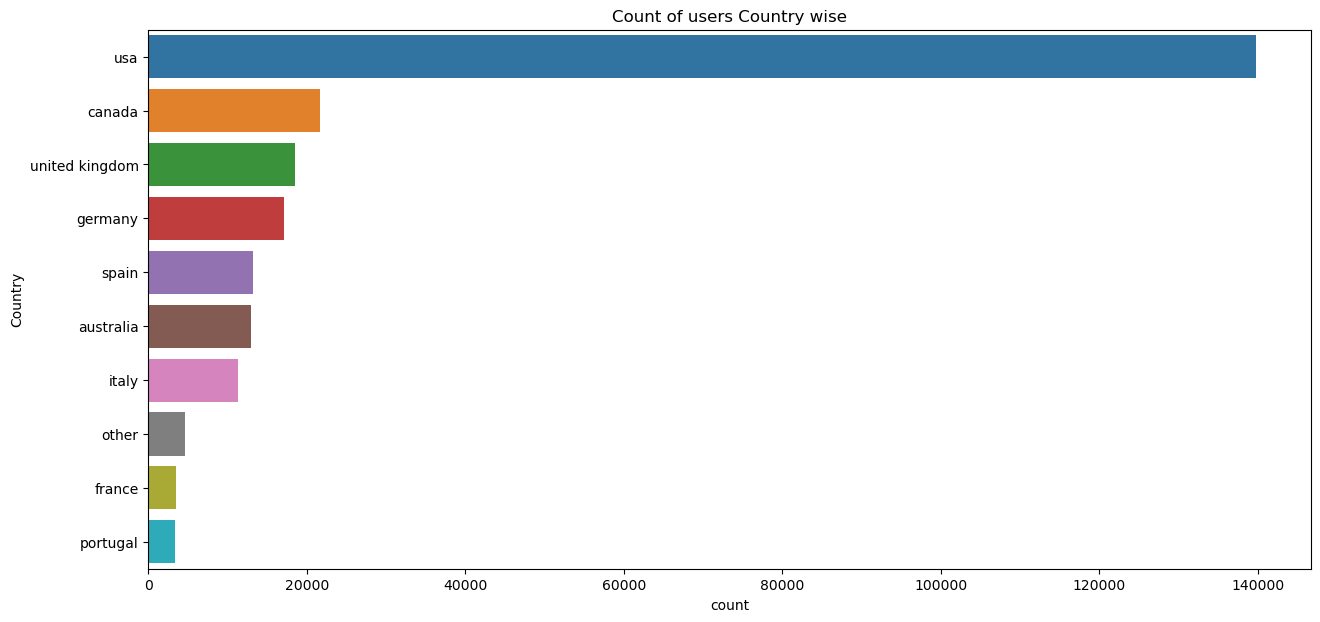

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users_data,order=pd.value_counts(users_data['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

In [33]:
users_data.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [34]:
books_data = pd.read_csv(r'C:\Users\dell\Desktop\PROJECT 1\Books.csv')

C:\Users\dell\AppData\Local\Temp\ipykernel_21764\3362758539.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv(r'C:\Users\dell\Desktop\PROJECT 1\Books.csv')


In [35]:
books_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [36]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [37]:
books_data.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242131,102023,202,16806,271044,271044,271041
top,195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [38]:
# checking duplicated values
books_data.loc[books_data.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [39]:
top_books = books_data['Book-Title'].value_counts().head(10)
top_books.index

Index(['Selected Poems', 'Little Women', 'Wuthering Heights', 'Dracula',
       'Adventures of Huckleberry Finn', 'The Secret Garden', 'Jane Eyre',
       'Pride and Prejudice', 'The Night Before Christmas',
       'Great Expectations'],
      dtype='object')

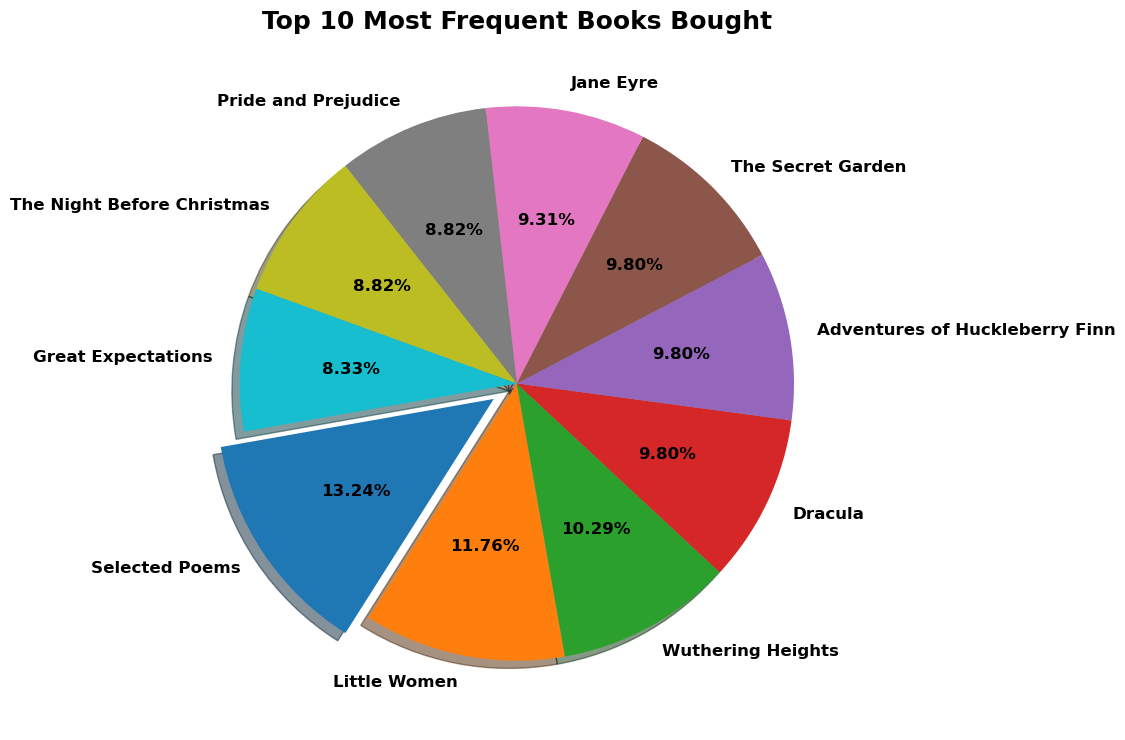

In [40]:
plt.figure(figsize = (16,9))
plt.pie(top_books,
       labels=top_books.index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold')
plt.show()

In [41]:
books_data['Year-Of-Publication'].value_counts()

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: Year-Of-Publication, Length: 202, dtype: int64

In [42]:
books_data['Year-Of-Publication'] = pd.to_numeric(books_data['Year-Of-Publication'], errors='coerce')

In [43]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


Text(0.5, 1.0, 'Top 10 Authors')

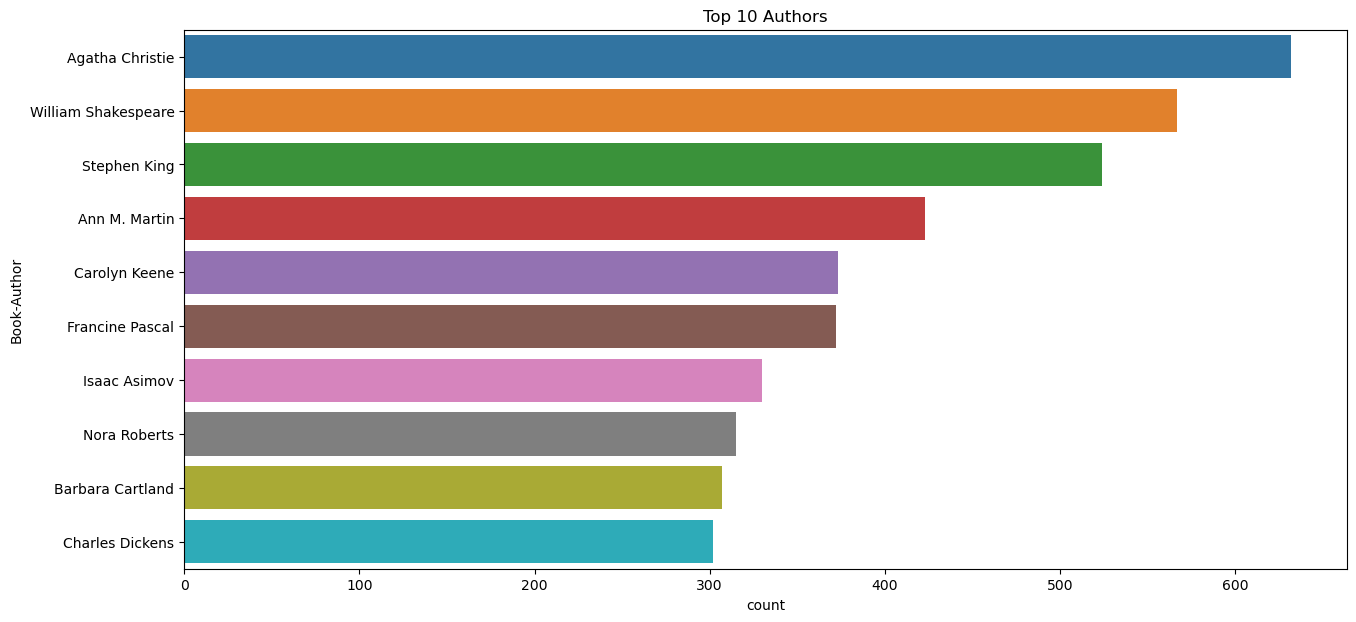

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books_data,order=pd.value_counts(books_data['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

Text(0.5, 1.0, 'Top 10 Publishers')

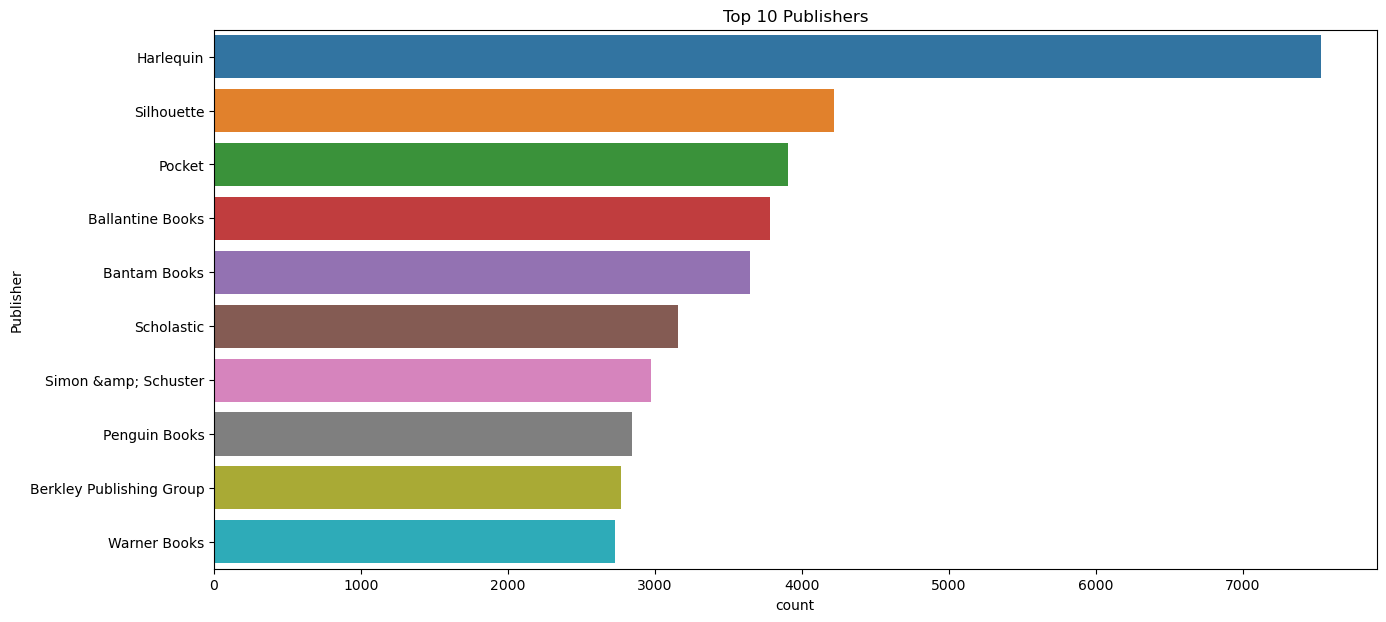

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books_data,order=pd.value_counts(books_data['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [46]:
books_data['Year-Of-Publication']=books_data['Year-Of-Publication'].astype('str')
a=list(books_data['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0.0', '1376.0', '1378.0', '1806.0', '1897.0', '1900.0', '1901.0', '1902.0', '1904.0', '1906.0', '1908.0', '1909.0', '1910.0', '1911.0', '1914.0', '1917.0', '1919.0', '1920.0', '1921.0', '1922.0', '1923.0', '1924.0', '1925.0', '1926.0', '1927.0', '1928.0', '1929.0', '1930.0', '1931.0', '1932.0', '1933.0', '1934.0', '1935.0', '1936.0', '1937.0', '1938.0', '1939.0', '1940.0', '1941.0', '1942.0', '1943.0', '1944.0', '1945.0', '1946.0', '1947.0', '1948.0', '1949.0', '1950.0', '1951.0', '1952.0', '1953.0', '1954.0', '1955.0', '1956.0', '1957.0', '1958.0', '1959.0', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0', '2

In [47]:
books_data['Book-Author'].fillna('other',inplace=True)

In [48]:
books_data.loc[books_data.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [49]:
books_data.Publisher.fillna('other',inplace=True)

In [50]:
books_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [51]:
books_data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [52]:
ratings_data = pd.read_csv(r'C:\Users\dell\Desktop\PROJECT 1\Ratings.csv')

In [53]:
ratings_data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [54]:
ratings_data['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
104999        1
105002        1
105008        1
105014        1
123969        1
Name: User-ID, Length: 95513, dtype: int64

In [55]:
ratings_data['User-ID'].unique().shape

(95513,)

In [56]:
x = ratings_data['User-ID'].value_counts() > 200

In [57]:
x[x]

11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
28634     True
59727     True
188951    True
155916    True
44296     True
Name: User-ID, Length: 815, dtype: bool

In [58]:
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             88793,  33145, 116122,   9856,  73681,  28634,  59727, 188951,
            155916,  44296],
           dtype='int64', length=815)

In [59]:
ratings_data = ratings_data[ratings_data['User-ID'].isin(y)]

In [60]:
ratings_data

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,26217457,0
1458,277427,003008685X,8
1459,277427,30615321,0
1460,277427,60002050,0
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [61]:
ratings_data.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,26217457,0
1458,277427,003008685X,8
1459,277427,30615321,0
1460,277427,60002050,0


In [62]:
ratings_with_books = ratings_data.merge(books_data,on = 'ISBN')

In [63]:
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
446862,250764,440236681,0,Empires of Sand,David W. Ball,2001.0,Dell Publishing Company
446863,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988.0,New Amer Library (Mm)
446864,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982.0,Dover Publications
446865,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988.0,Dover Publications


In [64]:
num_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [65]:
num_rating.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [66]:
num_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)

In [67]:
num_rating.head()

,Book-Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [68]:
final_ratings=ratings_with_books.merge(num_rating,on = 'Book-Title')

In [69]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74


In [70]:
final_ratings.shape

(446867, 8)

In [71]:
final_ratings = final_ratings[final_ratings['num_of_rating'] > 50]

In [72]:
final_ratings.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [73]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
...,...,...,...,...,...,...,...,...
210492,198699,743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,75
210493,225087,743439651,10,Still Waters,Jennifer Lauck,2001.0,Atria,75
210494,242299,743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,75
210495,127233,61090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),75


In [74]:
final_ratings = final_ratings.rename({'User-ID' : 'userid','Book-Title' : 'booktitle','Book-Rating' : 'bookrating'},axis=1)

In [75]:
pivot_table = final_ratings.pivot_table(index='userid',
                                 columns='booktitle',
                                 values='bookrating')

In [76]:
pivot_table

booktitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userid,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
pivot_table.fillna(0, inplace=True)

In [78]:
pivot_table

booktitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,...,Winter Moon,Winter Solstice,Wish You Well,Without Remorse,Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userid,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [80]:
user_sim = 1 - pairwise_distances(pivot_table.values,metric='cosine')

In [81]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.12370028, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12370028, 1.        , ..., 0.        , 0.        ,
        0.06275062],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.06275062, ..., 0.        , 0.        ,
        1.        ]])

In [82]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [83]:
user_sim_df.index = final_ratings.userid.unique()
user_sim_df.columns = final_ratings.userid.unique()

In [84]:
user_sim_df

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,...,164465,154176,89192,222488,79441,35433,178950,142454,133567,193560
277427,1.000000,0.0000,0.000000,0.118987,0.0,0.217181,0.000000,0.000000,0.000000,0.227212,...,0.067976,0.089932,0.075765,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3363,0.000000,1.0000,0.123700,0.000000,0.0,0.000000,0.000000,0.343401,0.000000,0.000000,...,0.084842,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
11676,0.000000,0.1237,1.000000,0.000000,0.0,0.000000,0.149252,0.000000,0.106672,0.000000,...,0.000000,0.006090,0.068410,0.000000,0.0,0.0,0.0,0.0,0.0,0.062751
12538,0.118987,0.0000,0.000000,1.000000,0.0,0.000000,0.063994,0.000000,0.088126,0.096967,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
13552,0.000000,0.0000,0.000000,0.000000,1.0,0.000000,0.146490,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35433,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000
178950,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.052673,0.000000,0.000000,0.041080,...,0.038000,0.000000,0.000000,0.081361,0.0,0.0,1.0,0.0,0.0,0.000000
142454,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
133567,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067330,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000


In [85]:
user_sim_df.iloc[0:15, 0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
277427,1.000000,0.000000,0.000000,0.118987,0.000000,0.217181,0.000000,0.000000,0.000000,0.227212,0.000000,0.072270,0.125810,0.066203,0.000000
3363,0.000000,1.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.022882,0.000000
11676,0.000000,0.123700,1.000000,0.000000,0.000000,0.000000,0.149252,0.000000,0.106672,0.000000,0.125976,0.058004,0.000000,0.052879,0.000000
12538,0.118987,0.000000,0.000000,1.000000,0.000000,0.000000,0.063994,0.000000,0.088126,0.096967,0.000000,0.000000,0.026002,0.072040,0.000000
13552,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.146490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104703,0.168805
16795,0.217181,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24194,0.000000,0.000000,0.149252,0.063994,0.146490,0.000000,1.000000,0.000000,0.276215,0.076509,0.000000,0.048975,0.034878,0.102764,0.105095
25981,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26535,0.000000,0.000000,0.106672,0.088126,0.000000,0.000000,0.276215,0.000000,1.000000,0.086008,0.000000,0.113000,0.061943,0.264560,0.000000
28204,0.227212,0.000000,0.000000,0.096967,0.000000,0.000000,0.076509,0.000000,0.086008,1.000000,0.000000,0.191316,0.173787,0.169606,0.000000


In [86]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:15, 0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
277427,0.000000,0.000000,0.000000,0.118987,0.000000,0.217181,0.000000,0.000000,0.000000,0.227212,0.000000,0.072270,0.125810,0.066203,0.000000
3363,0.000000,0.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.022882,0.000000
11676,0.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.149252,0.000000,0.106672,0.000000,0.125976,0.058004,0.000000,0.052879,0.000000
12538,0.118987,0.000000,0.000000,0.000000,0.000000,0.000000,0.063994,0.000000,0.088126,0.096967,0.000000,0.000000,0.026002,0.072040,0.000000
13552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104703,0.168805
16795,0.217181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24194,0.000000,0.000000,0.149252,0.063994,0.146490,0.000000,0.000000,0.000000,0.276215,0.076509,0.000000,0.048975,0.034878,0.102764,0.105095
25981,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26535,0.000000,0.000000,0.106672,0.088126,0.000000,0.000000,0.276215,0.000000,0.000000,0.086008,0.000000,0.113000,0.061943,0.264560,0.000000
28204,0.227212,0.000000,0.000000,0.096967,0.000000,0.000000,0.076509,0.000000,0.086008,0.000000,0.000000,0.191316,0.173787,0.169606,0.000000


In [87]:
user_sim_df.loc[16795,175886]


0.5867208825030442

In [88]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:15]

277427    173835
3363       25981
11676     223087
12538     208147
13552     183995
16795     175886
24194      50225
25981      27647
26535      43806
28204     229329
30533     206567
31826     166123
41084     138578
43246     235392
44728     183196
dtype: int64

In [89]:
user_sim_df.sort_values((44728),ascending=False).iloc[0:5,0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
183196,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.298408
180917,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.298408
197659,0.039684,0.0,0.0,0.000000,0.000000,0.099621,0.000000,0.0,0.0,0.026217,0.0,0.037886,0.100166,0.058565,0.292462
28591,0.000000,0.0,0.0,0.195096,0.318997,0.000000,0.000000,0.0,0.0,0.083303,0.0,0.000000,0.000000,0.066800,0.227359
153621,0.000000,0.0,0.0,0.000000,0.258371,0.000000,0.052988,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.054104,0.224614


In [90]:
final_ratings[(final_ratings['userid']==13552)|(final_ratings['userid']==183995)].head(10)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
472,13552,61009059,0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,99
1164,13552,670032379,0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,188
1300,13552,312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,98
1500,13552,316096199,0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,105
1652,13552,316284955,0,White Oleander : A Novel (Oprah's Book Club),Janet Fitch,2000.0,Back Bay Books,102
1756,13552,316569321,0,White Oleander : A Novel,Janet Fitch,1999.0,"Little, Brown",108
2681,183995,345361792,0,A Prayer for Owen Meany,John Irving,1990.0,Ballantine Books,125
3359,13552,380710218,8,Postmortem,Patricia Daniels Cornwell,1993.0,Harper Mass Market Paperbacks (Mm),69


In [91]:
user1=final_ratings[(final_ratings['userid']==13552)]
user1

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
472,13552,61009059,0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,99
1164,13552,670032379,0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,188
1300,13552,312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,98
1500,13552,316096199,0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,105
...,...,...,...,...,...,...,...,...
165072,13552,515136379,0,Key of Knowledge (Key Trilogy (Paperback)),Nora Roberts,2003.0,Jove Books,55
165127,13552,515136530,0,"Key of Valor (Roberts, Nora. Key Trilogy, 3.)",Nora Roberts,2003.0,Jove Pubns,55
167908,13552,553569910,0,The Ugly Duckling,Iris Johansen,1997.0,Bantam Books,54
170730,13552,671027387,0,Deception Point,Dan Brown,2002.0,Pocket,64


In [92]:
user2=final_ratings[(final_ratings['userid']==183995)]
user2

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74
2681,183995,345361792,0,A Prayer for Owen Meany,John Irving,1990.0,Ballantine Books,125
3861,183995,385484518,10,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997.0,Doubleday,127
6748,183995,440225701,0,The Street Lawyer,JOHN GRISHAM,1999.0,Dell,162
15697,183995,080410526X,0,All I Really Need to Know,ROBERT FULGHUM,1989.0,Ivy Books,120
17255,183995,440211727,0,A Time to Kill,JOHN GRISHAM,1992.0,Dell,188
17680,183995,440214041,0,The Pelican Brief,John Grisham,1993.0,Dell,216
23532,183995,345380371,5,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books,101
28578,183995,038550120X,0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,205
30608,183995,399145672,0,Big Trouble,Dave Barry,1999.0,Putnam Publishing Group,74


In [93]:
pd.merge(user1,user2,on='booktitle',how='outer')

,userid_x,ISBN_x,bookrating_x,booktitle,Book-Author_x,Year-Of-Publication_x,Publisher_x,num_of_rating_x,userid_y,ISBN_y,bookrating_y,Book-Author_y,Year-Of-Publication_y,Publisher_y,num_of_rating_y
0,13552.0,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74.0,183995.0,002542730X,10.0,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,74.0
1,13552.0,61009059,0.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13552.0,670032379,0.0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13552.0,312966091,0.0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13552.0,316096199,0.0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,It Was on Fire When I Lay Down on It,NaN,NaN,NaN,NaN,183995.0,804105820,0.0,Robert Fulghum,1993.0,Ivy Books,60.0
178,NaN,NaN,NaN,Unnatural Exposure,NaN,NaN,NaN,NaN,183995.0,399142851,0.0,Patricia Daniels Cornwell,1997.0,Putnam Pub Group,79.0
179,NaN,NaN,NaN,1st to Die: A Novel,NaN,NaN,NaN,NaN,183995.0,316666009,8.0,James Patterson,2001.0,Little Brown and Company,149.0
180,NaN,NaN,NaN,The Celestine Prophecy (Celestine Prophecy),NaN,NaN,NaN,NaN,183995.0,044651862X,0.0,James Redfield,1994.0,Warner Books,56.0


In [94]:
book_read_by_user1 = list(set(user1['booktitle']))
book_read_by_user2 = list(set(user2['booktitle']))

for book_name in book_read_by_user1:
  if book_name not in book_read_by_user2:
    print("Recommendation : ", book_name) 

Recommendation :  Gerald's Game
Recommendation :  Postmortem
Recommendation :  Cause of Death
Recommendation :  Three Fates
Recommendation :  The Witching Hour (Lives of the Mayfair Witches)
Recommendation :  STONES FROM THE RIVER
Recommendation :  Life of Pi
Recommendation :  Drowning Ruth
Recommendation :  The Runaway Jury
Recommendation :  Journey
Recommendation :  A Case of Need
Recommendation :  Kaleidoscope
Recommendation :  Schindler's List
Recommendation :  A Civil Action
Recommendation :  Phantoms
Recommendation :  Lightning
Recommendation :  A Bend in the Road
Recommendation :  Confessions of a Shopaholic (Summer Display Opportunity)
Recommendation :  One for the Money (Stephanie Plum Novels (Paperback))
Recommendation :  Evening Class
Recommendation :  Message from Nam
Recommendation :  It
Recommendation :  Four Past Midnight
Recommendation :  The Testament
Recommendation :  Violin
Recommendation :  The Firm
Recommendation :  The Secret Life of Bees
Recommendation :  Insomni

In [95]:
book_read_by_user1 = list(set(user1['booktitle']))
book_read_by_user2 = list(set(user2['booktitle']))

for book_name in book_read_by_user2:
  if book_name not in book_read_by_user1:
    print("Recommendation : ", book_name)         #books recommended to user1 

Recommendation :  The General's Daughter
Recommendation :  A Is for Alibi (Kinsey Millhone Mysteries (Paperback))
Recommendation :  It Was on Fire When I Lay Down on It
Recommendation :  The Celestine Prophecy (Celestine Prophecy)
Recommendation :  Stupid White Men ...and Other Sorry Excuses for the State of the Nation!
Recommendation :  Fatherhood
Recommendation :  Unnatural Exposure
Recommendation :  1st to Die: A Novel
Recommendation :  Rising Sun
Recommendation :  Dances With Wolves
Recommendation :  A Prayer for Owen Meany
Recommendation :  Brave New World
Recommendation :  F Is for Fugitive (Kinsey Millhone Mysteries (Paperback))
Recommendation :  L Is for Lawless
Recommendation :  Master of the Game
Recommendation :  Big Trouble


In [96]:
#new_df = user_sim_df[user_sim_df > 0.20]
#new_df

In [97]:
#most_similar_users_ids = {}
#for user_id_val in new_df.columns:
   # similar_ids = list(new_df[user_id_val][new_df[user_id_val].notnull()].index)
    #most_similar_users_ids[user_id_val] = similar_ids
#most_similar_users_ids

In [98]:
top_n = 5
most_similar_users_ids = {}
for user_id_val in user_sim_df.columns:
    # Sort the user IDs by similarity score in descending order
    similar_ids = user_sim_df[user_id_val].sort_values(ascending=False).index.tolist()
    # Remove the user's own ID from the list
    similar_ids.remove(user_id_val)
    # Store the top N  similar user IDs in the dictionary
    most_similar_users_ids[user_id_val] = similar_ids[:top_n]
most_similar_users_ids

{277427: [173835, 229329, 114865, 32440, 68555],
 3363: [25981, 116122, 209756, 134837, 145449],
 11676: [223087, 83287, 229313, 153563, 164027],
 12538: [208147, 227705, 238545, 113817, 222296],
 13552: [183995, 95010, 135265, 229551, 236340],
 16795: [175886, 68555, 159033, 69078, 83637],
 24194: [50225, 13082, 161752, 26535, 43806],
 25981: [27647, 3363, 9856, 7158, 231237],
 26535: [43806, 24194, 43246, 208671, 114178],
 28204: [229329, 190807, 179978, 131675, 129716],
 30533: [206567, 170184, 147965, 223087, 52917],
 31826: [166123, 159376, 133747, 174304, 86641],
 41084: [138578, 174791, 96448, 225810, 50730],
 43246: [235392, 133747, 26535, 189835, 159376],
 44728: [183196, 180917, 197659, 28591, 153621],
 51883: [86641, 160032, 107021, 201447, 209516],
 52584: [88733, 173632, 43246, 238961, 218552],
 55548: [73394, 217106, 201674, 197775, 225087],
 60244: [50547, 205980, 205473, 238961, 203820],
 71712: [55892, 238545, 115002, 50225, 94923],
 77809: [191187, 79186, 88793, 20607

In [99]:
#similar_books = []

#for all_users_val in user_sim_df.columns:
    #print('Recommendation for userid',all_users_val)
    #for simi_users in most_similar_users_ids[all_users_val]:
        #similar_books.extend(final_ratings[final_ratings['userid']==simi_users]['booktitle'])
        #print(similar_books)
        #print("%"*50)
        


In [100]:
import pandas as pd
def get_top_n_similar_users(user_id, top_n=5):
    # Sort the user IDs by similarity score in descending order
    similar_ids = user_sim_df[user_id].sort_values(ascending=False).index.tolist()
    # Remove the user's own ID from the list
    similar_ids.remove(user_id)
    # Return the top N similar user IDs
    return similar_ids[:top_n]

# Usage example
user_id = 153621  # Replace with the specific user ID you're interested in
top_n = 5  # Replace with the desired number of similar users
similar_users = get_top_n_similar_users(user_id, top_n)
print("Top", top_n, "similar users for user", user_id, ":", similar_users)


Top 5 similar users for user 153621 : [177374, 241198, 13552, 183995, 44728]


In [101]:
def get_top_rated_books_for_user(user_id, top_n=5):
    # Filter the final_ratings DataFrame for the given user
    user_ratings = final_ratings[final_ratings['userid'] == user_id]
    
    # Sort the user's ratings by book rating in descending order
    user_top_rated_books = user_ratings.sort_values(by='bookrating', ascending=False).head(top_n)
    
    return user_top_rated_books
# Usage example
user_id = 44728  # Replace with the specific user ID you're interested in
top_n = 5  # Replace with the desired number of top-rated books

users_top_rated_books = get_top_rated_books_for_user(user_id, top_n)

print("Users Top", top_n, "rated books for user", user_id, ":")
print(users_top_rated_books)

Users Top 5 rated books for user 44728 :
       userid       ISBN  bookrating  \
92937   44728  446611085          10   
7961    44728  449221482          10   
63603   44728   70212570          10   
9188    44728  553279556          10   
59332   44728  553279912          10   

                                               booktitle      Book-Author  \
92937                       Suzanne's Diary for Nicholas  James Patterson   
7961                                   J Is for Judgment      Sue Grafton   
63603      Fried Green Tomatoes at the Whistle Stop Cafe     Fannie Flagg   
9188   E Is for Evidence: A Kinsey Millhone Mystery (...      Sue Grafton   
59332  A Is for Alibi (Kinsey Millhone Mysteries (Pap...      SUE GRAFTON   

      Year-Of-Publication      Publisher  num_of_rating  
92937              2003.0   Warner Books            129  
7961               1999.0  Fawcett Books             71  
63603              1989.0    McGraw-Hill            120  
9188               1989

In [102]:
get_top_rated_books_for_user(177374,5)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
106194,177374,671014188,10,The Summerhouse,Jude Deveraux,2001.0,Atria,75
5894,177374,439136350,10,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,124
5934,177374,043936213X,10,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001.0,Scholastic,71
8778,177374,515132020,10,Heaven and Earth (Three Sisters Island Trilogy),Nora Roberts,2003.0,Jove Books,87
37919,177374,515128546,10,Tears of the Moon (Irish Trilogy),Nora Roberts,2000.0,Jove Books,73


In [103]:
get_top_rated_books_for_user(197659,5)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
52325,197659,039527222X,10,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,1988.0,Houghton Mifflin,76
122936,197659,451169514,10,It,Stephen King,1997.0,Signet Book,76
152060,197659,395272211,10,"The Return of the King (The Lord of the Rings,...",J. R. R. Tolkien,1988.0,Houghton Mifflin,74
153804,197659,042510107X,9,Red Storm Rising,Tom Clancy,1997.0,Berkley Publishing Group,72
58207,197659,345378490,9,Congo,Michael Crichton,1995.0,Ballantine Books,107


In [104]:
get_top_rated_books_for_user(28591,5)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
48259,28591,670880728,10,Bridget Jones's Diary,Helen Fielding,1998.0,Viking Books,250
48656,28591,316769487,10,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",89
12406,28591,971880107,6,Wild Animus,Rich Shapero,2004.0,Too Far,323
36083,28591,804119708,0,Over the Edge,Suzanne Brockmann,2001.0,Ivy Books,56
49244,28591,375727345,0,House of Sand and Fog,Andre Dubus III,2000.0,Vintage Books,160


In [105]:
get_top_rated_books_for_user(153621,5)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
12574,153621,971880107,6,Wild Animus,Rich Shapero,2004.0,Too Far,323
125859,153621,671039725,0,Carrie,Stephen King,2002.0,Pocket,51


In [106]:
#def recommend_books_to_user(user_id, top_n=5):
    # Get the most similar users
    #similar_users = get_top_n_similar_users(user_id, top_n)
    
    #recommended_books = []
    
    #for sim_user in similar_users:
        # Filter books rated by the similar user
        #sim_user_ratings = final_ratings[final_ratings['userid'] == sim_user]
        
        # Find the top-rated book by the similar user
        #top_rated_book = sim_user_ratings.sort_values(by='bookrating', ascending=False).head(1)
        
        # Add the top-rated book by the similar user to the recommended books list
        #recommended_books.append(top_rated_book['booktitle'].values[0])
    
    #return recommended_books

# Usage example
#user_id = 44728  # Replace with the specific user ID you're interested in
#top_n = 5  # Replace with the desired number of book recommendations
#recommended_books = recommend_books_to_user(user_id, top_n)
#print("Top", top_n, "book recommendations for user", user_id, ":", recommended_books)


In [107]:
def recommend_books_to_user(user_id,top_n=10):
    # Get the most similar users
    similar_users = get_top_n_similar_users(user_id,top_n=10)
    
    recommended_books = []
    
    for sim_user in similar_users:
        # Filter books rated by the similar user
        sim_user_ratings = final_ratings[final_ratings['userid'] == sim_user]
        
        # Find the top-rated book by the similar user
        top_rated_book = sim_user_ratings.sort_values(by='bookrating', ascending=False).head()
        
        top_rated_book_title = top_rated_book['booktitle'].values[0]
        
        # Check if the user has not already rated the book
        if top_rated_book_title not in final_ratings[final_ratings['userid'] == user_id]['booktitle'].values:
            recommended_books.append(top_rated_book_title)
    
    return recommended_books

# Usage example
user_id = 44728  # Replace with the specific user ID you're interested in
#top_n = 10  # Replace with the desired number of book recommendations
recommended_books = recommend_books_to_user(user_id,top_n=10)
print( "book recommendations for user", user_id, ":", recommended_books)


book recommendations for user 44728 : ['Midwives: A Novel', 'The Hunt for Red October', 'The Two Towers (The Lord of the Rings, Part 2)', "Bridget Jones's Diary", 'The Thorn Birds', 'The Secret Garden', 'The Fellowship of the Ring (The Lord of the Rings, Part 1)', "Fortune's Rocks : A Novel"]


In [108]:
recommend_books_to_user(153621)

['The Summerhouse',
 'The Accidental Tourist',
 'The Da Vinci Code',
 'Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
 "Suzanne's Diary for Nicholas",
 'The Witching Hour (Lives of the Mayfair Witches)',
 'Fast Food Nation: The Dark Side of the All-American Meal',
 'Big Trouble',
 'The Secret Life of Bees',
 'Dawn (Cutler)']

In [109]:
recommend_books_to_user(3363)

['Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)',
 'Carrie',
 'Evening Class',
 "The Color of Water: A Black Man's Tribute to His White Mother",
 'Cold Mountain',
 'Inner Harbor (Quinn Brothers (Paperback))',
 'Flesh and Blood',
 'Life of Pi']

In [110]:
import pickle
from pickle import dump
from pickle import load

In [115]:
pickle.dump(final_ratings,open('userid.pkl','wb'))

In [116]:
final_ratings['userid'].values

array([277427,   3363,  11676, ..., 242299, 127233, 178667], dtype=int64)

In [117]:
final_ratings['booktitle'].values

array(['Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
       'Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
       'Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
       ..., 'Still Waters', 'Still Waters', 'Still Waters'], dtype=object)

In [118]:
pickle.dump(final_ratings,open('booktitle.pkl','wb'))

In [111]:
filename = 'model_name.pkl'
pickle.dump(final_ratings.to_dict(), open("final_ratings1.pkl", 'wb'))
pickle.dump(pivot_table,open('pivot_table1.pkl','wb'))

In [112]:
pickle.dump(user_sim_df,open('user_sim_df1.pkl','wb'))

In [113]:
pickle.dump(user_sim,open('model2.pkl','wb'))
pickle.dump(recommended_books,open('rm1.pkl','wb'))

In [114]:
pickle.dump(users_data,open('users_data1.pkl','wb'))